In [23]:
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

## Loading the mnist dataset from sklearn

In [24]:
mnist = load_digits()
mnist.data.shape

(1797, 64)

In [25]:
pd.DataFrame(mnist.data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [26]:
mnist.target.shape

(1797,)

In [27]:
len(mnist.data[0])

64

## Factor Analysis

Factor Analysis (FA).

A simple linear generative model with Gaussian latent variables.

The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. Without loss of generality the factors are distributed according to a Gaussian with zero mean and unit covariance. The noise is also zero mean and has an arbitrary diagonal covariance matrix.

## Performing factor analysis
Here, we reduce the dimensionality of the features to 10

In [28]:
fa = FactorAnalysis(n_components=10, random_state=123)
z = fa.fit_transform(mnist.data)
z.shape

(1797, 10)

In [29]:
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9
0,-0.137682,-0.345500,0.299633,-1.964890,0.131388,-0.543294,0.854779,-0.882733,0.105022,0.346685
1,-0.876863,-0.212599,-0.289595,1.597254,-0.686167,0.263516,-1.761568,0.089412,-0.288956,0.767700
2,-1.079785,0.634491,-0.079147,1.519223,-1.585191,-0.357723,1.440194,-1.429385,-0.904890,-1.681560
3,0.643335,0.736808,0.653374,0.087544,-0.467310,0.866322,-0.744105,1.349558,0.013035,1.048830
4,-1.567630,-0.107409,-0.666044,0.147479,-0.726444,2.162796,0.622288,0.083669,0.675323,0.074913
...,...,...,...,...,...,...,...,...,...,...
1792,-0.203052,-0.018559,1.886885,-0.685014,-0.258193,-0.236861,-0.760494,-0.301666,-0.065745,0.642226
1793,-0.123894,-0.128567,-0.239166,-2.097233,-0.104741,-0.887154,0.705658,-1.447609,-0.172683,0.272573
1794,-0.703092,-0.072442,-0.646984,0.425525,-1.183108,-0.665684,-0.145152,-0.648046,-1.308386,1.197597
1795,-0.331626,-0.025683,1.309561,-0.548834,-0.007503,0.085643,-0.897940,-0.811411,-0.082541,0.580797


## Data visualisation
Each colour represents a digit

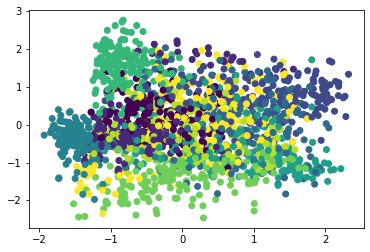

In [30]:
plt.scatter(z[:, 0], z[:, 1], c=mnist.target)

## Observe for the data where the digit is 2

In [31]:
digit = 2
df_digit = [mnist.data[i] for i in range(len(mnist.data)) if mnist.target[i] == digit]
len(df_digit)

177

## We perform factor analysis
We fit the reduced feature dimensionality and get a FactorAnalysis object

In [32]:
fa = FactorAnalysis(n_components=10, random_state=123)
z = fa.fit(df_digit)
z

FactorAnalysis(n_components=10, random_state=123)

## We have the old and the new features

In [33]:
z.components_.shape

(10, 64)

In [34]:
df_digit[0]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

## We observe the new features after dimensionality reduction
We see a faint image of 2

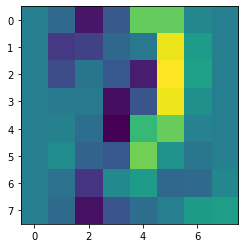

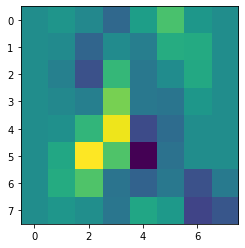

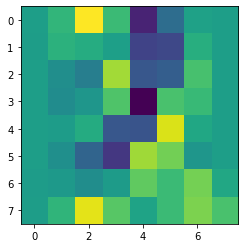

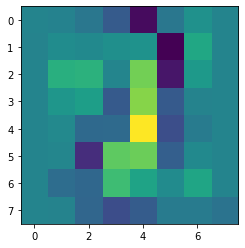

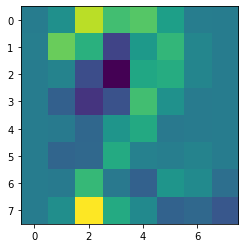

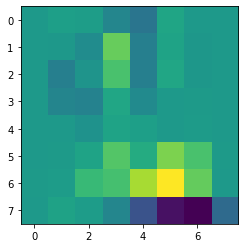

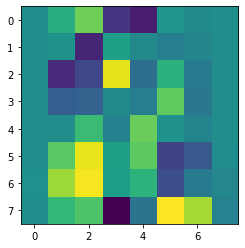

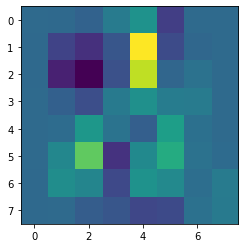

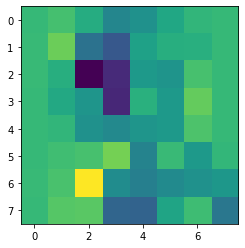

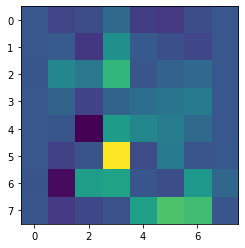

In [35]:
for i in range(10):
    plt.imshow(z.components_[i].reshape(8,8), )
    plt.show()